C:\Users\GeraschenkoKM\AppData\Local\Temp\ipykernel_20552\452344232.py:15: RuntimeWarning: divide by zero encountered in power
  return A * (t ** (k - 1)) * np.exp(-t / theta) / (theta ** k * sp.gamma(k))
C:\Users\GeraschenkoKM\AppData\Local\Temp\ipykernel_20552\452344232.py:18: RuntimeWarning: divide by zero encountered in power
  term1 = (k - 1) * t ** (k - 2) * np.exp(-t / theta)


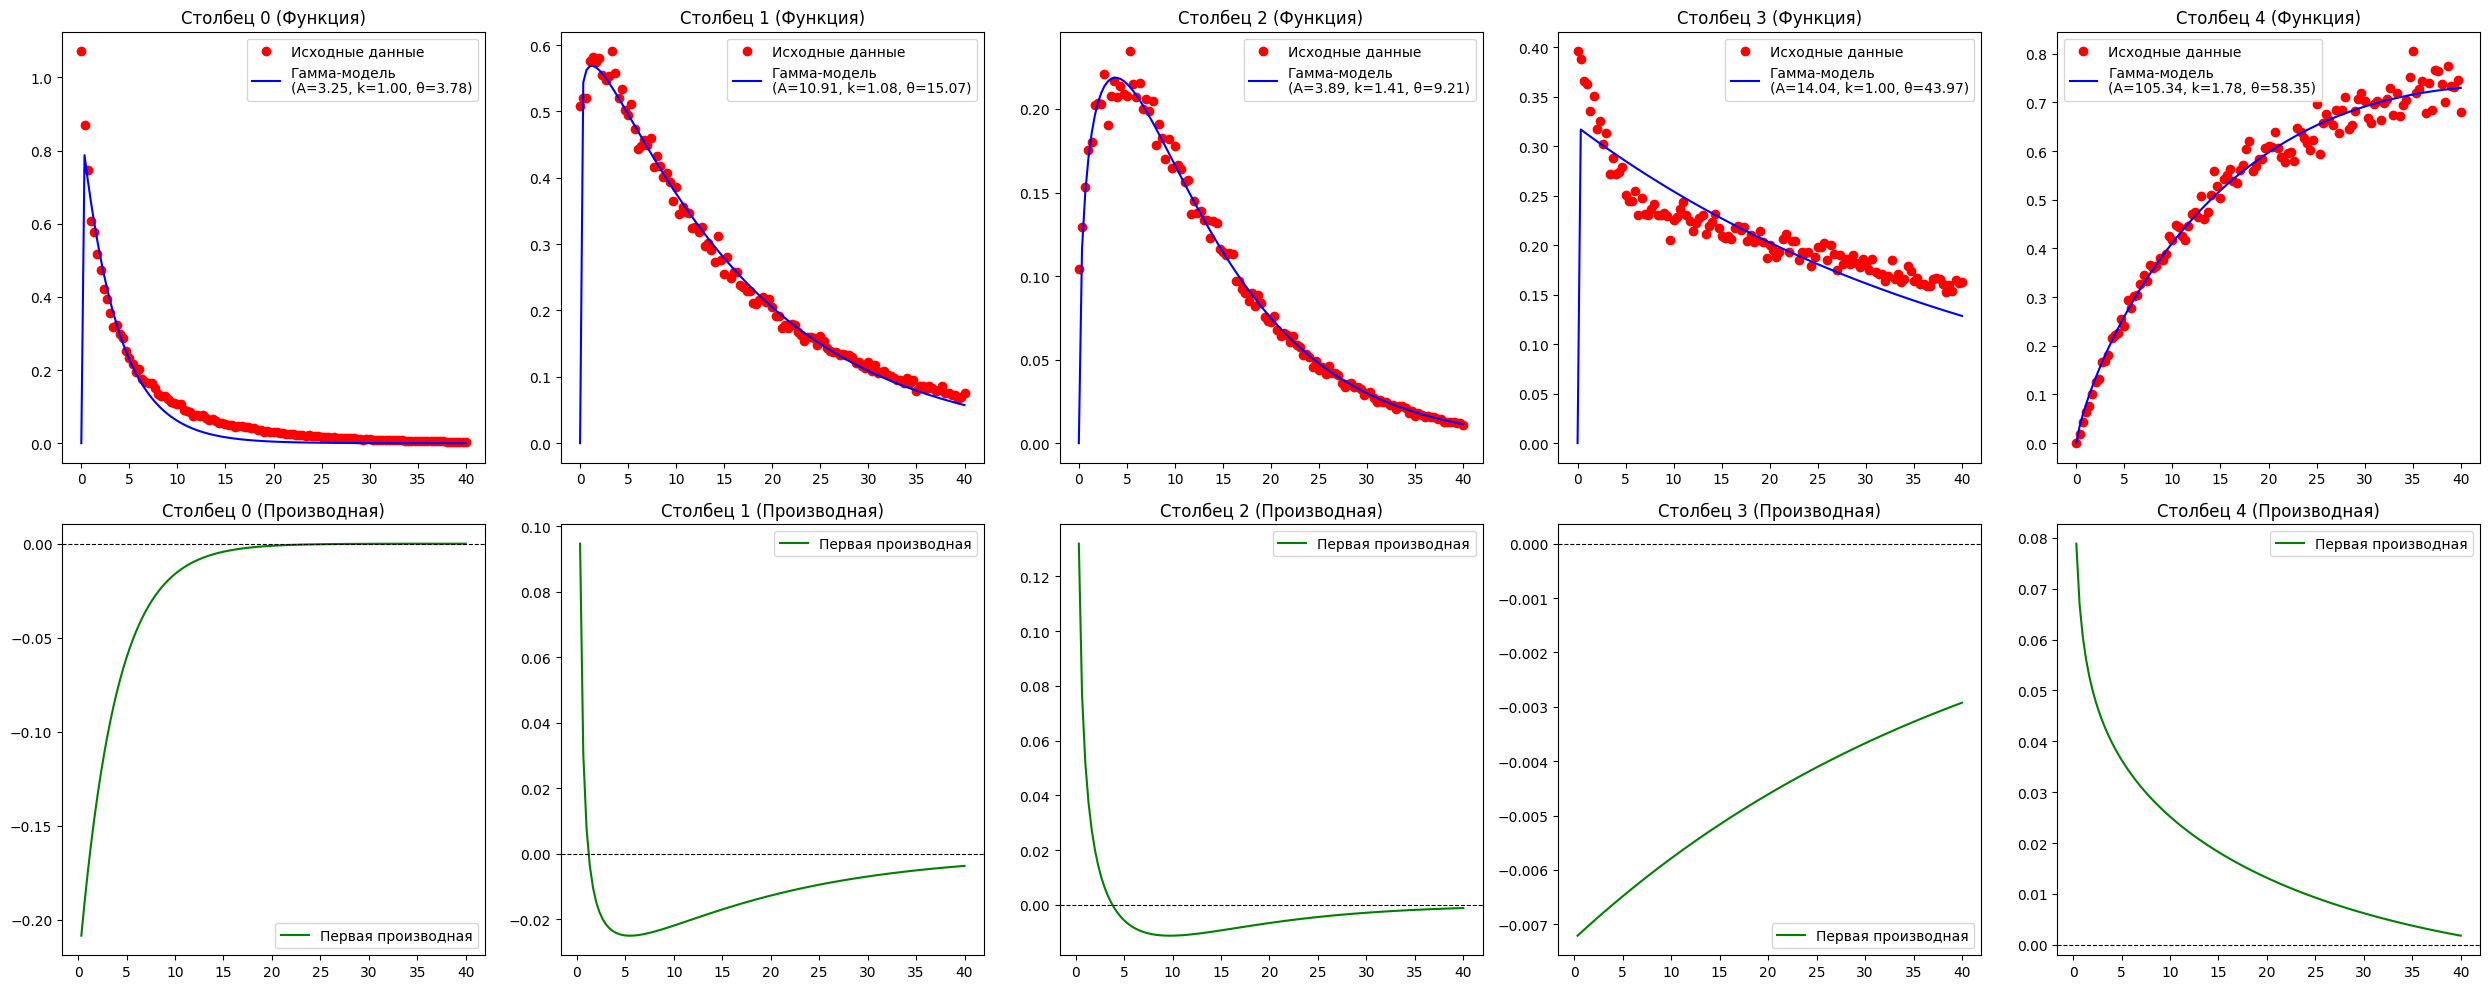

0: A=3.247, k=1.000, θ=3.776
1: A=10.912, k=1.080, θ=15.069
2: A=3.891, k=1.414, θ=9.206
3: A=14.044, k=1.000, θ=43.967
4: A=105.335, k=1.784, θ=58.351


In [1]:
import numpy as np
import scipy.optimize as opt
import scipy.special as sp
import matplotlib.pyplot as plt
import pandas as pd

# Загрузка данных из файла
file_path = "generate_concentrations_1.csv"
data = pd.read_csv(file_path)

# Количество столбцов
num_columns = data.shape[1]

def gamma_function(t, A, k, theta):
    return A * (t ** (k - 1)) * np.exp(-t / theta) / (theta ** k * sp.gamma(k))

def gamma_derivative(t, A, k, theta):
    term1 = (k - 1) * t ** (k - 2) * np.exp(-t / theta)
    term2 = t ** (k - 1) * np.exp(-t / theta) / theta
    return A * (term1 - term2) / (theta ** k * sp.gamma(k))

# Временная ось (предполагаем, что шаг времени равномерный)
tsteps = np.linspace(0, 40, 40*3 + 1)

# Создание графиков для каждого столбца
fig, axes = plt.subplots(2, num_columns, figsize=(5 * num_columns, 10))
if num_columns == 1:
    axes = [axes]

for i, column in enumerate(data.columns):
    column_data = data[column]
    
    # Подбор параметров функции изменения во времени
    params, _ = opt.curve_fit(gamma_function, tsteps[:len(column_data)], column_data, p0=[1, 2, 1])
    A_opt, k_opt, theta_opt = params
    
    # Вычисление функции и её производной
    fit_curve = gamma_function(tsteps, A_opt, k_opt, theta_opt)
    fit_derivative = gamma_derivative(tsteps, A_opt, k_opt, theta_opt)
    
    # Визуализация функции
    axes[0, i].scatter(tsteps, column_data, label='Исходные данные', color='red')
    axes[0, i].plot(tsteps, fit_curve, label=f'Гамма-модель\n(A={A_opt:.2f}, k={k_opt:.2f}, θ={theta_opt:.2f})', color='blue')
    axes[0, i].set_title(f'Столбец {column} (Функция)')
    axes[0, i].legend()
    
    # Визуализация производной
    axes[1, i].plot(tsteps, fit_derivative, label='Первая производная', color='green')
    axes[1, i].set_title(f'Столбец {column} (Производная)')
    axes[1, i].axhline(0, color='black', linestyle='--', linewidth=0.8)
    axes[1, i].legend()

plt.tight_layout()
plt.show()

# Вывод оптимальных параметров для всех столбцов
for column in data.columns:
    column_data = data[column]
    params, _ = opt.curve_fit(gamma_function, tsteps[:len(column_data)], column_data, p0=[1, 2, 1])
    A_opt, k_opt, theta_opt = params
    print(f"{column}: A={A_opt:.3f}, k={k_opt:.3f}, θ={theta_opt:.3f}")


### Добавляю в функцию Гамма-распределения еще слогаемое-константу

C:\Users\GeraschenkoKM\AppData\Local\Temp\ipykernel_6836\2342818689.py:15: RuntimeWarning: divide by zero encountered in power
  return con + A * (t ** (k - 1)) * np.exp(-t / theta) / (theta ** k * sp.gamma(k))
C:\Users\GeraschenkoKM\AppData\Local\Temp\ipykernel_6836\2342818689.py:18: RuntimeWarning: divide by zero encountered in power
  term1 = (k - 1) * t ** (k - 2) * np.exp(-t / theta)
C:\Users\GeraschenkoKM\AppData\Local\Temp\ipykernel_6836\2342818689.py:15: RuntimeWarning: invalid value encountered in scalar power
  return con + A * (t ** (k - 1)) * np.exp(-t / theta) / (theta ** k * sp.gamma(k))


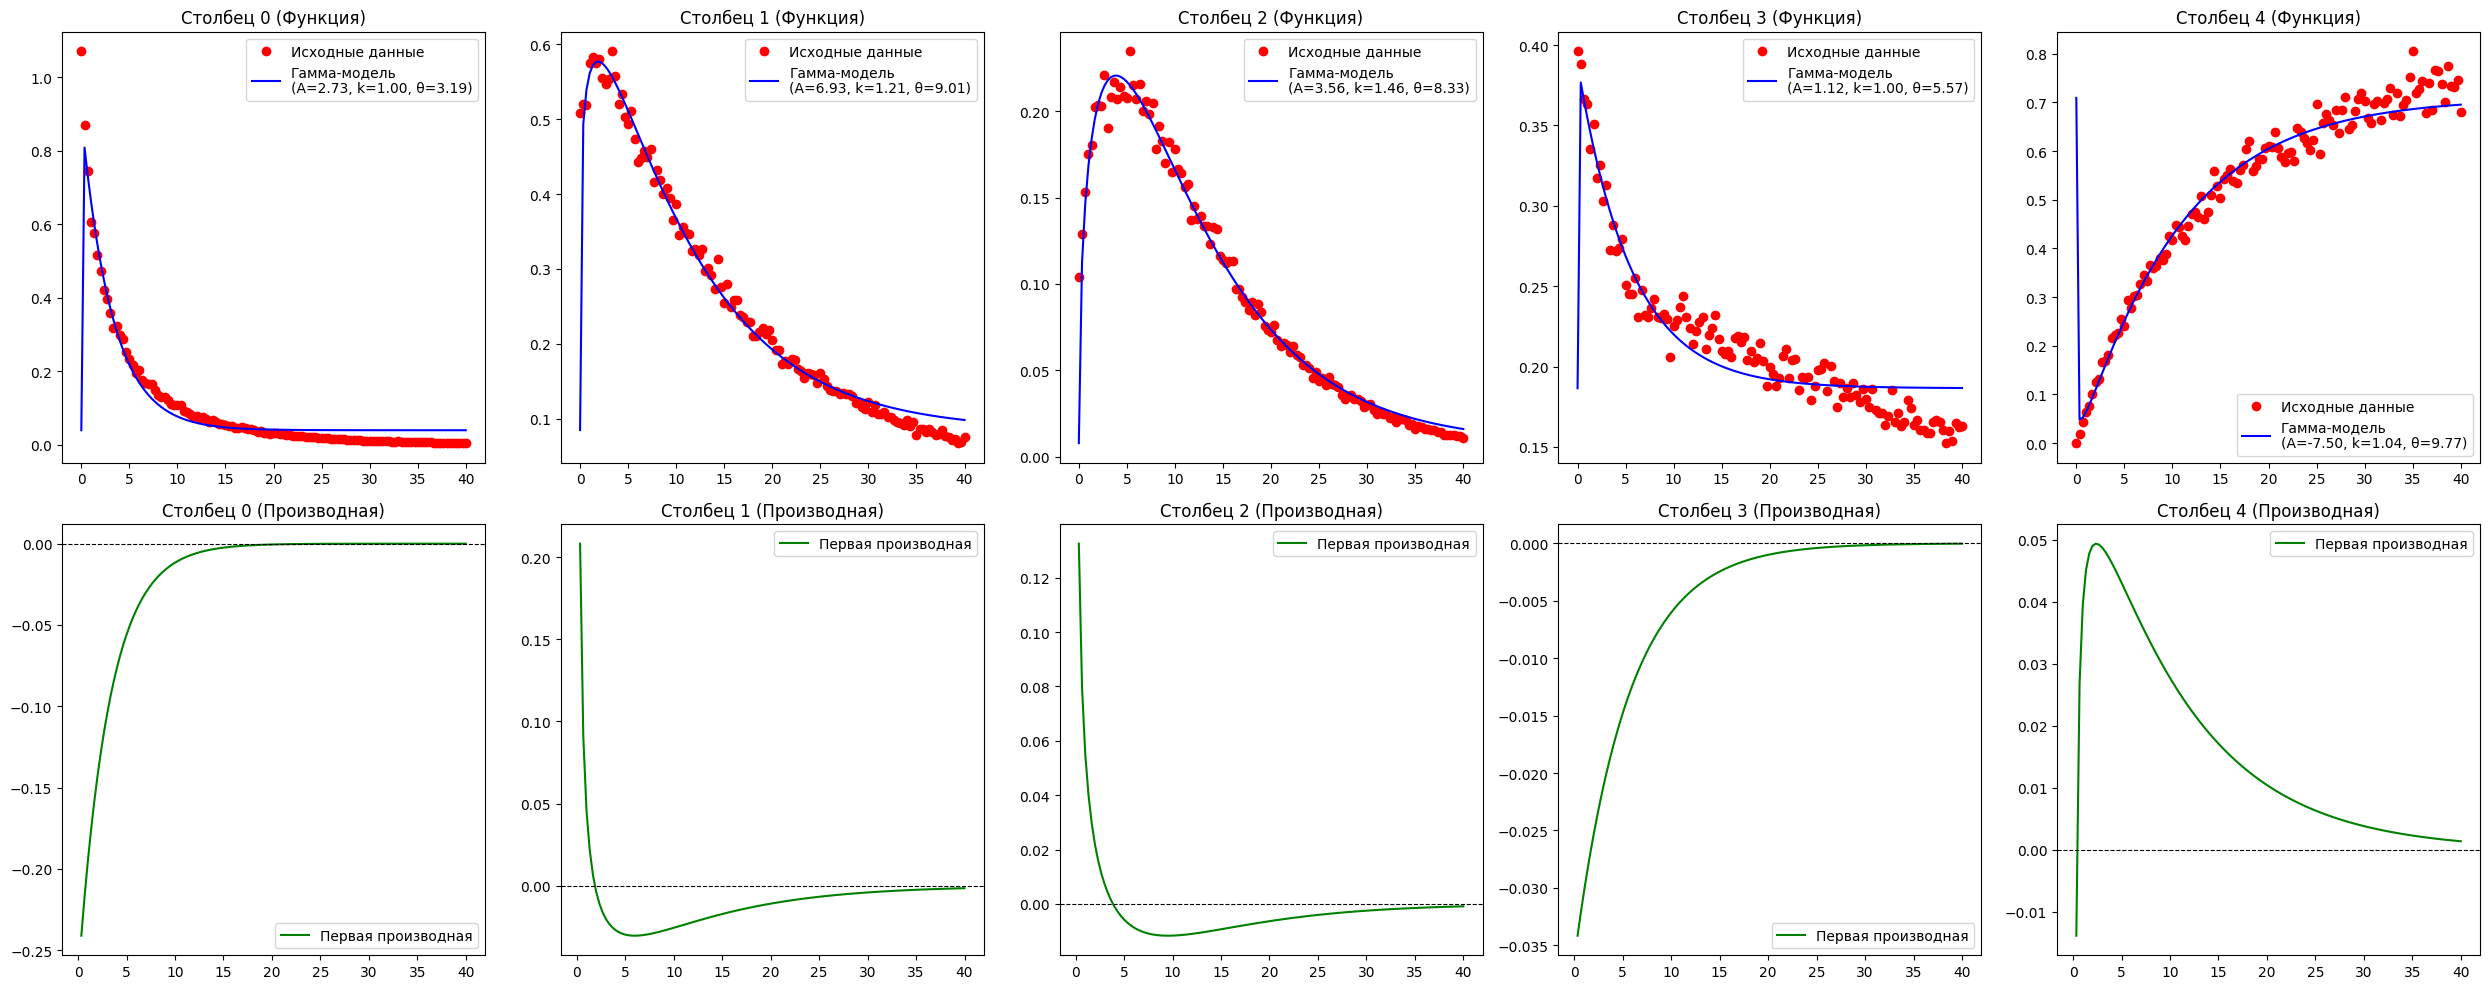

0: A=2.73044, k=1.00000, θ=3.19430, const=0.03892
1: A=6.92854, k=1.20671, θ=9.01440, const=0.08473
2: A=3.55826, k=1.46304, θ=8.32876, const=0.00796
3: A=1.12398, k=1.00000, θ=5.56657, const=0.18650
4: A=-7.50176, k=1.04109, θ=9.77233, const=0.70914


In [ ]:
import numpy as np
import scipy.optimize as opt
import scipy.special as sp
import matplotlib.pyplot as plt
import pandas as pd

# Загрузка данных из файла
file_path = "generate_concentrations_1.csv"
data = pd.read_csv(file_path)

# Количество столбцов
num_columns = data.shape[1]

def gamma_function_mod(t, A, k, theta, con):
    return con + A * (t ** (k - 1)) * np.exp(-t / theta) / (theta ** k * sp.gamma(k))

def gamma_derivative(t, A, k, theta):
    term1 = (k - 1) * t ** (k - 2) * np.exp(-t / theta)
    term2 = t ** (k - 1) * np.exp(-t / theta) / theta
    return A * (term1 - term2) / (theta ** k * sp.gamma(k))

# Временная ось (предполагаем, что шаг времени равномерный)
tsteps = np.linspace(0, 40, 40*3 + 1)

# Создание графиков для каждого столбца
fig, axes = plt.subplots(2, num_columns, figsize=(5 * num_columns, 10))
if num_columns == 1:
    axes = [axes]

for i, column in enumerate(data.columns):
    column_data = data[column].dropna().values  # Убираем возможные NaN
    
    # Подбор параметров функции изменения во времени
    params, _ = opt.curve_fit(gamma_function_mod, tsteps[:len(column_data)], column_data, p0=[1, 2, 1, 0])
    A_opt, k_opt, theta_opt, con_opt = params
    
    # Вычисление функции и её производной
    fit_curve = gamma_function_mod(tsteps, A_opt, k_opt, theta_opt, con_opt)
    fit_derivative = gamma_derivative(tsteps, A_opt, k_opt, theta_opt)
    
    # Визуализация функции
    axes[0, i].scatter(tsteps, column_data, label='Исходные данные', color='red')
    axes[0, i].plot(tsteps, fit_curve, label=f'Гамма-модель\n(A={A_opt:.2f}, k={k_opt:.2f}, θ={theta_opt:.2f})', color='blue')
    axes[0, i].set_title(f'Столбец {column} (Функция)')
    axes[0, i].legend()
    
    # Визуализация производной
    axes[1, i].plot(tsteps, fit_derivative, label='Первая производная', color='green')
    axes[1, i].set_title(f'Столбец {column} (Производная)')
    axes[1, i].axhline(0, color='black', linestyle='--', linewidth=0.8)
    axes[1, i].legend()

plt.tight_layout()
plt.show()

# Вывод оптимальных параметров для всех столбцов
for column in data.columns:
    column_data = data[column].dropna().values
    params, _ = opt.curve_fit(gamma_function_mod, tsteps[:len(column_data)], column_data, p0=[1, 2, 1, 0])
    A_opt, k_opt, theta_opt, con_opt = params
    print(f"{column}: A={A_opt:.5f}, k={k_opt:.5f}, θ={theta_opt:.5f}, const={con_opt:.5f}")
